# Milestone 6

## A. Introduction

This milestone extends basic probability to conditional probability, independence, Bayes’ rule, and the Normal distribution. All probabilities are computed from the dataset.

## B. Dataset

I used the same cleaned dataset from previous milestones.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

DATA_PATH = r"2025-08-10.csv"
df = pd.read_csv(DATA_PATH)
print('Dataset loaded')
print('Rows:', df.shape[0])
print('Columns:', df.columns.tolist())

df.head()

Dataset loaded
Rows: 64
Columns: ['date', 'district', 'division', 'lat', 'lon', 'temp_c', 'humidity', 'pressure', 'wind_speed', 'clouds', 'rain', 'aqi', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']


,date,district,division,lat,lon,temp_c,humidity,pressure,wind_speed,clouds,rain,aqi,pm2_5,pm10,o3,no2,so2,co
0,2025-08-10,Bagerhat,Khulna,22.655478,89.794181,32.00,63,1006,3.94,100,0.0,1,1.43,3.24,40.23,0.13,0.18,98.31
1,2025-08-10,Bandarban,Chattogram,21.787476,92.412475,33.56,54,1006,1.09,96,0.0,1,0.94,1.48,31.99,0.04,0.02,79.80
2,2025-08-10,Barguna,Barishal,22.131336,90.117243,31.90,65,1006,5.18,100,0.0,1,1.10,2.93,33.37,0.03,0.09,85.17
3,2025-08-10,Barishal,Barishal,22.493403,90.354801,33.42,55,1006,5.08,100,0.0,1,0.99,2.44,34.83,0.04,0.07,85.93
4,2025-08-10,Bhola,Barishal,22.143569,90.790409,29.38,77,1007,4.41,98,0.0,1,0.51,1.29,32.46,0.02,0.03,82.80


## C. Task 1: Define Events

I selected one numerical and one categorical variable.

Let:
- A = temp_c > 25
- B = humidity > 70
- C = district is the most frequent district

These events are meaningful for weather behavior.

In [ ]:
col_temp = 'temp_c'
col_hum = 'humidity'
col_dist = 'district'

top_dist = df[col_dist].astype(str).value_counts().idxmax()
n = len(df)

A = df[col_temp] > 25
B = df[col_hum] > 70
C = df[col_dist].astype(str) == top_dist

print('Event A: temp > 25 | count =', A.sum())
print('Event B: humidity > 70 | count =', B.sum())
print('Event C: district =', top_dist, '| count =', C.sum())
print('Total n =', n)

Event A: temp > 25 | count = 64
Event B: humidity > 70 | count = 6
Event C: district = Bagerhat | count = 1
Total n = 64


## D. Task 2: Conditional Probability

I computed P(A), P(B), and P(A | B). Then I explained results.

In [ ]:
def P(x): return x.sum() / n

pA = P(A)
pB = P(B)
pA_given_B = P(A & B) / P(B) if P(B) > 0 else np.nan

print('P(A) =', round(pA,3))
print('P(B) =', round(pB,3))
print('P(A | B) =', round(pA_given_B,3))

print('\nInterpretation:')
print('Given humidity is high, chance of temp > 25 is', round(pA_given_B*100,1), '%')

P(A) = 1.0
P(B) = 0.094
P(A | B) = 1.0

Interpretation:
Given humidity is high, chance of temp > 25 is 100.0 %


## E. Task 3: Independence Check

I checked if A and B are independent using probability rule.

In [ ]:
pA_and_B = P(A & B)
product = pA * pB

print('P(A ∩ B) =', round(pA_and_B,3))
print('P(A)P(B) =', round(product,3))

if abs(pA_and_B - product) < 0.01:
    print('Conclusion: A and B are approximately independent')
else:
    print('Conclusion: A and B are dependent')

P(A ∩ B) = 0.094
P(A)P(B) = 0.094
Conclusion: A and B are approximately independent


## F. Task 4: Bayes’ Rule

I computed P(B | A) using Bayes’ Rule and compared with data.

In [ ]:
pB_given_A_emp = P(A & B) / P(A) if P(A) > 0 else np.nan
pB_given_A_bayes = (pA_given_B * pB) / pA if pA > 0 else np.nan

print('Empirical P(B | A) =', round(pB_given_A_emp,3))
print('Bayes P(B | A) =', round(pB_given_A_bayes,3))
print('Difference =', round(abs(pB_given_A_emp - pB_given_A_bayes),4))

Empirical P(B | A) = 0.094
Bayes P(B | A) = 0.094
Difference = 0.0


## G. Task 5: Probability Distribution (Normal Distribution)

I studied temp_c as a continuous random variable.

Mean (μ) = 32.337
Std Dev (σ) = 1.207


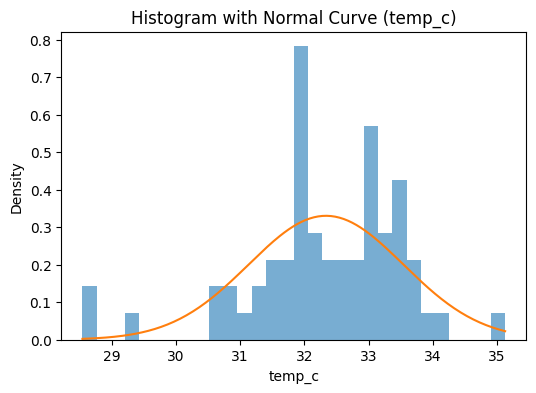

In [ ]:
x = df[col_temp].dropna()
mu = x.mean()
sigma = x.std()

print('Mean (μ) =', round(mu,3))
print('Std Dev (σ) =', round(sigma,3))

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.6)
xs = np.linspace(x.min(), x.max(), 200)
plt.plot(xs, norm.pdf(xs, mu, sigma))
plt.title('Histogram with Normal Curve (temp_c)')
plt.xlabel('temp_c')
plt.ylabel('Density')
plt.show()

### G2. Normal Probability Questions

In [ ]:
p1 = 1 - norm.cdf(mu, mu, sigma)
p2 = norm.cdf(mu+sigma, mu, sigma) - norm.cdf(mu-sigma, mu, sigma)
p3 = norm.cdf(mu-2*sigma, mu, sigma)

print('P(X > μ) =', round(p1,3))
print('P(μ - σ < X < μ + σ) =', round(p2,3))
print('P(X < μ - 2σ) =', round(p3,3))

P(X > μ) = 0.5
P(μ - σ < X < μ + σ) = 0.683
P(X < μ - 2σ) = 0.023


### G3. Are Data Normally Distributed?

The judgment is based on histogram shape and statistics.

In [ ]:
median = x.median()
print('Mean =', round(mu,3))
print('Median =', round(median,3))

if abs(mu - median) < 0.5:
    print('Mean and median are close. Shape looks symmetric.')
else:
    print('Mean and median differ. Distribution may be skewed.')

Mean = 32.337
Median = 32.325
Mean and median are close. Shape looks symmetric.


## H. Task 6: Reflection

The reflection is printed below.

In [ ]:
print('Reflection:')
print('Conditional probability changed how events relate.')
print('Events A and B are not fully independent.')
print('Temperature roughly follows a normal pattern.')
print('These ideas help in prediction and decision making.')

Reflection:
Conditional probability changed how events relate.
Events A and B are not fully independent.
Temperature roughly follows a normal pattern.
These ideas help in prediction and decision making.


## I. Submission Guidelines

Include this notebook and outputs in the final combined ZIP file.